# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st 

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import collections

## Подготовка данных

### Загрузка данных

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверка эффективности обогащения

In [7]:
# Функция для проверки эффективности обогащения
def recovery(C, F, T):
    '''
    C  — доля золота в концентрате после флотации/очистки;
    F — доля золота в сырье/концентрате до флотации/очистки;
    T — доля золота в отвальных хвостах после флотации/очистки.
    '''
    return (C * (F - T)) / (F * (C - T)) * 100

In [8]:
recovery_train = (
    train.loc[:, ['rougher.output.recovery', 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au']])
recovery_train = recovery_train.dropna(subset=['rougher.output.recovery'], axis=0)

In [9]:
recovery_check = recovery(
        recovery_train['rougher.output.concentrate_au'],
        recovery_train['rougher.input.feed_au'],
        recovery_train['rougher.output.tail_au'])

MAE(recovery_train['rougher.output.recovery'], recovery_check)

9.73512347450521e-15

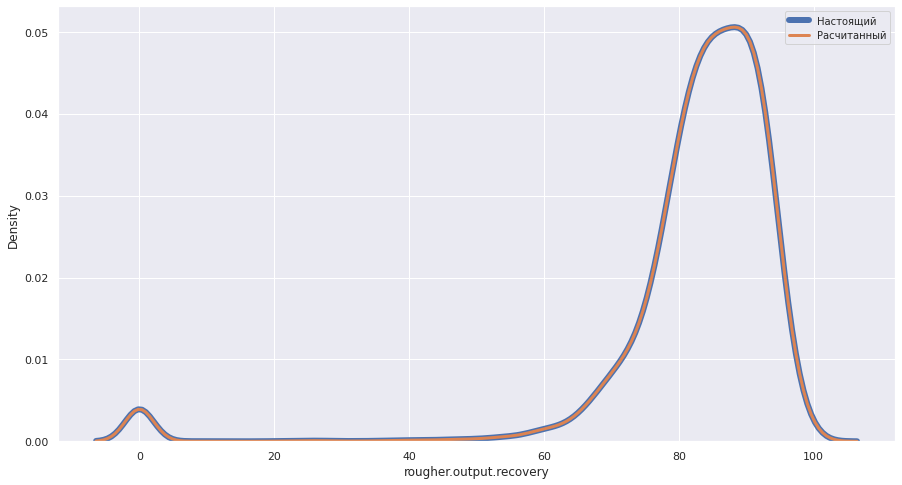

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(recovery_train['rougher.output.recovery'], label='Настоящий', alpha=.5, linewidth=6);
sns.kdeplot(recovery_check, label='Расчитанный', alpha=.1, linewidth=3);

plt.legend(prop={'size': 10});

Эффективность расчитана правильно, присутствует лишь незначительно малое отличие.

### Признаки, недоступные в тестовой выборке

In [11]:
print(f'Cтолбцов должно быть по итогу проверки: {train.shape[1] - test.shape[1]}')

Cтолбцов должно быть по итогу проверки: 34


In [12]:
# Простой цикл, который соберет все названия, которых нет в тестовой выборке
unavailable_columns = [i for i in train.columns if i not in test.columns]

In [13]:
len(unavailable_columns)

34

In [14]:
unavailable_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

#### Проанализируем признаки, недоступные в тестовой выборке

In [15]:
# Для облегчения будем использовать collections
step = collections.Counter()
param_type = collections.Counter()
param_name = collections.Counter()

for column in unavailable_columns:
    words = column.split('.')

    step[words[0]] += 1
    param_type[words[1]] += 1
    param_name[words[2]] += 1

In [16]:
step, param_type, param_name

(Counter({'final': 9,
          'primary_cleaner': 8,
          'rougher': 13,
          'secondary_cleaner': 4}),
 Counter({'output': 30, 'calculation': 4}),
 Counter({'concentrate_ag': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'concentrate_au': 3,
          'recovery': 2,
          'tail_ag': 4,
          'tail_pb': 4,
          'tail_sol': 4,
          'tail_au': 4,
          'sulfate_to_au_concentrate': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'au_pb_ratio': 1}))

Сложно глазу зацепиться, давайте посчитаем типы параметров вместе с наименованием.

In [17]:
param = collections.Counter()

for column in unavailable_columns:
    param[column.split('.', 1)[1]] += 1

In [18]:
param

Counter({'output.concentrate_ag': 3,
         'output.concentrate_pb': 3,
         'output.concentrate_sol': 3,
         'output.concentrate_au': 3,
         'output.recovery': 2,
         'output.tail_ag': 4,
         'output.tail_pb': 4,
         'output.tail_sol': 4,
         'output.tail_au': 4,
         'calculation.sulfate_to_au_concentrate': 1,
         'calculation.floatbank10_sulfate_to_au_feed': 1,
         'calculation.floatbank11_sulfate_to_au_feed': 1,
         'calculation.au_pb_ratio': 1})

1. Большая часть параметров отсутствует именно в параметрах продукта: 
- Отвальные хвосты
- Концентрация металлов
- Эффективность обогащения
2. Отсутствует некоторые параметры в расчётных характеристиках:
- Концентрация сульфата к золоту
- Отношение золота к свинцу
- У этапа флотации и финального этапа отсутствуют признаки обогащения

### Предобработка данных

#### Recovery в тестовой выборке

Попробуем восстановить *recovery* в тестовой выборке.

In [19]:
test_recovery = test.merge(
    full.loc[:,['date', 'rougher.output.recovery', 'final.output.recovery']],on='date')

In [20]:
cleared_test = test_recovery.drop(['date'], axis=1)

In [21]:
cleared_test[['rougher.output.recovery', 'final.output.recovery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  5290 non-null   float64
 1   final.output.recovery    5290 non-null   float64
dtypes: float64(2)
memory usage: 124.0 KB


Восстановление было проведено удачно. 

#### Пропуски

Пропуски будем заполнять медианой.

In [22]:
imputer = SimpleImputer(strategy='median')

cleared_train = train.drop(['date'], axis=1)
train_data = pd.DataFrame(data = imputer.fit_transform(cleared_train),
             columns=cleared_train.columns,
             index = cleared_train.index)

In [23]:
imputer = SimpleImputer(strategy='median')

test_data = pd.DataFrame(data = imputer.fit_transform(cleared_test),
             columns= cleared_test.columns,
             index = cleared_test.index)

## Анализ данных

### Концентрация металлов на разных этапах

Делать функцию для такого будет лишь усложнение, на мой взгляд, потому вручную для каждого металла соберем в датафрейм информацию по этапам и визуализируем эти датафреймы.

In [24]:
df_ag = full[['rougher.input.feed_ag',
              'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]

df_ag = df_ag.rename(columns={'rougher.input.feed_ag': 'до флотации', 
                              'rougher.output.concentrate_ag': 'после флотации', 
                              'primary_cleaner.output.concentrate_ag': 'первичная очистка', 
                              'final.output.concentrate_ag': 'финальная очистка'})

In [25]:
df_pb = full[['rougher.input.feed_pb',
              'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]

df_pb = df_pb.rename(columns={'rougher.input.feed_pb': 'до флотации',
                              'rougher.output.concentrate_pb': 'флотация', 
                              'primary_cleaner.output.concentrate_pb': 'первичная очистка', 
                              'final.output.concentrate_pb': 'финальная очистка'})

In [26]:
df_au = full[['rougher.input.feed_au',
              'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]

df_au = df_au.rename(columns={'rougher.input.feed_au': 'до флотации',
                              'rougher.output.concentrate_au': 'флотация', 
                              'primary_cleaner.output.concentrate_au': 'первичная очистка', 
                              'final.output.concentrate_au': 'финальная очистка'})

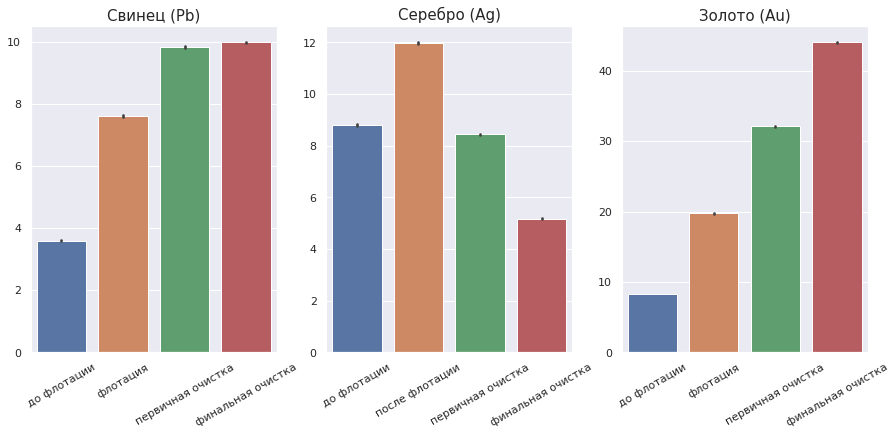

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

sns.barplot(data=df_pb, ax=ax1);
plt.setp(ax1.get_xticklabels(), rotation=30);
ax1.set_title('Свинец (Pb)', fontsize=15);

sns.barplot(data=df_ag, ax=ax2);
plt.setp(ax2.get_xticklabels(), rotation=30);
ax2.set_title('Серебро (Ag)', fontsize=15);

sns.barplot(data=df_au, ax=ax3);
plt.setp(ax3.get_xticklabels(), rotation=30);
ax3.set_title('Золото (Au)', fontsize=15);

Концентрация свинца и золота увеличивается на каждом этапе. 

Концентрация серебра увеличивается после флотации, но уменьшается после очисток.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

In [28]:
train['rougher.input.feed_size'].describe()

count    14005.000000
mean        60.110518
std         22.418485
min          9.659576
25%         48.973027
50%         55.373885
75%         66.080172
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [29]:
test['rougher.input.feed_size'].describe()

count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64

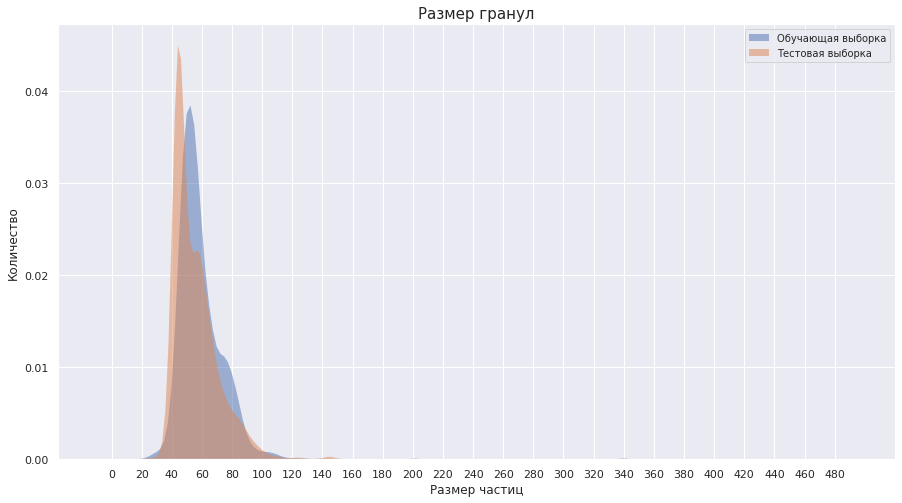

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(data=train_data['rougher.input.feed_size'], label='Обучающая выборка', alpha=.5, linewidth=0, fill=True);
sns.kdeplot(data=test_data['rougher.input.feed_size'], label='Тестовая выборка', alpha=.5, linewidth=0, fill=True);

ax.set_xticks([x for x in range(0, 500, 20)])
ax.set_xlabel('')

plt.xlabel('Размер частиц');
plt.ylabel('Количество');

plt.legend(prop={'size': 10});
plt.title('Размер гранул', fontdict={'fontsize': 15});

Графики хоть и отличаются, но имеют схожую тенденцию. Более того, среднее двух выборок тоже отличается не так сильно. Будем считать, что распределения равны.

### Суммарная концентрация веществ на разных стадиях

In [31]:
rough_feed = full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)

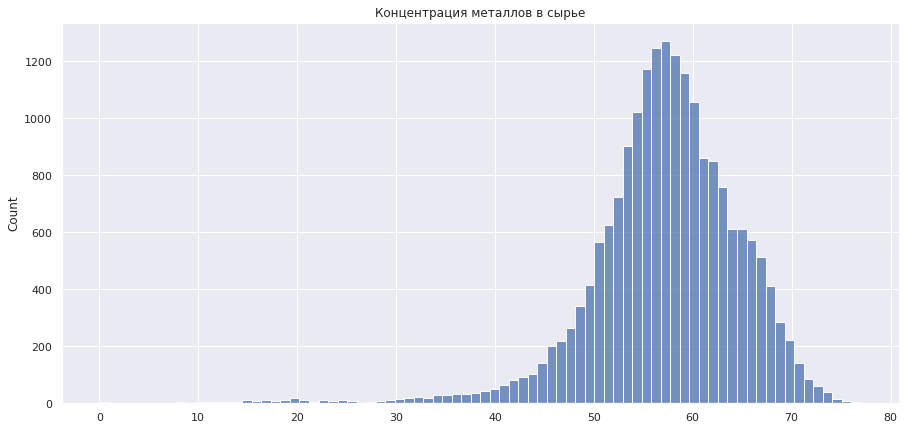

In [32]:
plt.subplots(figsize = (15, 7))

sns.histplot(rough_feed, bins=80)

plt.title('Концентрация металлов в сырье');

In [33]:
rough_concentration = full[['rougher.output.concentrate_pb', 
                            'rougher.output.concentrate_ag', 
                            'rougher.output.concentrate_sol', 
                            'rougher.output.concentrate_au']].sum(axis=1)

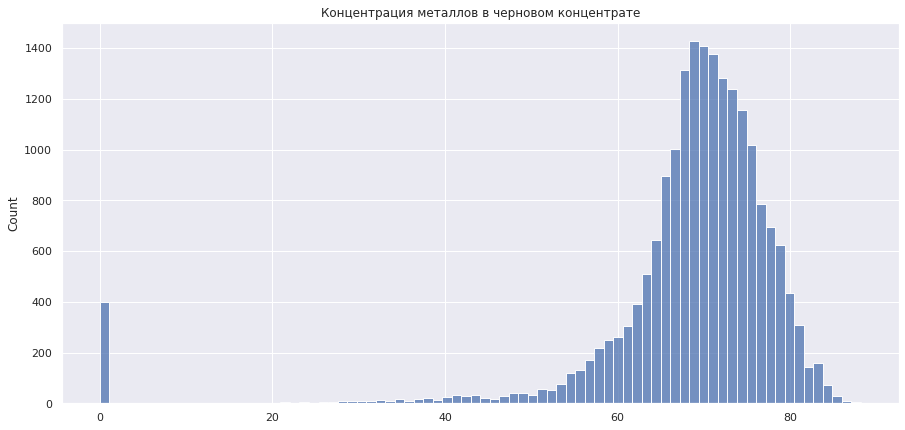

In [34]:
plt.subplots(figsize = (15, 7))

sns.histplot(rough_concentration, bins=80)

plt.title('Концентрация металлов в черновом концентрате');

In [35]:
fin_concentration = full[['final.output.concentrate_pb', 
                          'final.output.concentrate_ag', 
                          'final.output.concentrate_sol', 
                          'final.output.concentrate_au']].sum(axis=1)

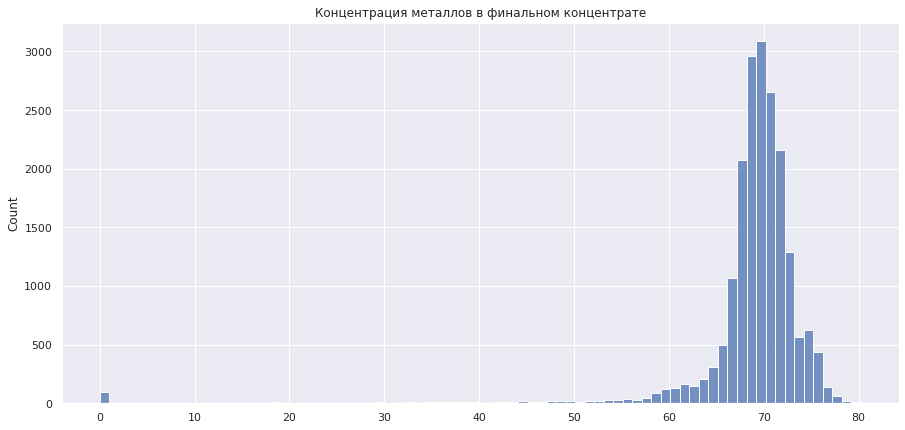

In [36]:
plt.subplots(figsize = (15, 7))

sns.histplot(fin_concentration, bins=80)

plt.title('Концентрация металлов в финальном концентрате');

Невероятное количество значений равных 0. Аномально. Они могут ухудшить качество финальной модели, потому лучше избавиться от них. Меньше, зато качественней.

#### Избавимся от аномалий

In [37]:
rough_feed[rough_feed == 0].shape

(0,)

In [38]:
rough_concentration[rough_concentration == 0].shape

(394,)

In [39]:
fin_concentration[fin_concentration == 0].shape

(98,)

Удалим нули в концентрате.

In [40]:
# находим строки, где сумма одного из концентратов для тренировочной выборки равна 0
indexes_of_0_train = (train_data[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
                          'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1) == 0) | (
    train_data[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1) == 0
)

indexes_of_0_train.sum()

354

In [41]:
train_data = train_data.drop(train_data[indexes_of_0_train].index, axis=0).reset_index(drop=True)

In [42]:
# находим строки, где сумма одного из концентратов равна 0
indexes_of_0_full = (full[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
                          'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1) == 0) | (
    full[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1) == 0
)
indexes_of_0_full.sum()

490

In [43]:
full_data = full.drop(full[indexes_of_0_full].index, axis=0).reset_index(drop=True)

Проверим

In [44]:
# находим строки, где сумма одного из концентратов для тренировочной выборки равна 0
indexes_of_0_train = (train_data[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
                          'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1) == 0) | (
    train_data[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1) == 0
)

indexes_of_0_train.sum()

0

In [45]:
# находим строки, где сумма одного из концентратов равна 0
indexes_of_0_full = (full_data[['final.output.concentrate_pb', 'final.output.concentrate_ag', 
                          'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1) == 0) | (
    full_data[['rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1) == 0
)
indexes_of_0_full.sum()

0

Аномалий больше нет.

## Модель

### SMAPE

sMAPE - симметричное среднее абсолютное процентное отклонение. Эта метрика понадобиться для нынешней задачи, так как в отличие от MAE она относительна, одинаково учитывает масштаб и целевого признака, и предсказания.

In [59]:
def sMAPE(y_true,y_pred):
    return np.sum(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2)) * 100 * 1/len(y_true)

In [60]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [48]:
custom_score = make_scorer(sMAPE,greater_is_better=False)

### Обучение моделей

#### Разделим данные

In [78]:
# выделим признаки и цель для тестовой выборки для концентрата чернового
features_test_rough = test_data.filter(regex='^rougher',axis=1).drop(['rougher.output.recovery'], axis=1)
target_test_rough = test_data['rougher.output.recovery']

# и концентрата финального
features_test_final = test_data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = test_data['final.output.recovery']

In [88]:
# выделим признаки и цель для тренировочной выборки для концентрата чернового
features_train_rough = features_train_rough.loc[:, features_test_rough.columns]
target_train_rough = train_data['rougher.output.recovery']

# и концентрата финального
features_train_final = train_data.loc[:, features_test_final.columns]
target_train_final = train_data['final.output.recovery']

In [89]:
print(features_train_rough.shape)
print(target_train_rough.shape)
print()
print(features_train_final.shape)
print(target_train_final.shape)
print()
print(features_test_rough.shape)
print(target_test_rough.shape)
print()
print(features_test_final.shape)
print(target_test_final.shape)

(13795, 22)
(13795,)

(13795, 52)
(13795,)

(5290, 22)
(5290,)

(5290, 52)
(5290,)


#### Лучшая модель

In [90]:
model = LinearRegression()
scorer = make_scorer(sMAPE, greater_is_better=False)

rougher_lin = cross_val_score(model, features_train_rough, target_train_rough, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5)

print('sMAPE:', final_sMAPE(rougher_lin, final_lin).mean())

sMAPE: -10.162835385066364


In [91]:
for depth in range(1, 21, 3):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scorer = make_scorer(sMAPE, greater_is_better=False)
    
    rougher_tree = cross_val_score(model, features_train_rough, target_train_final, scoring=scorer, cv=5)
    final_tree = cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5)
    
    print('Глубина:',depth)
    print('sMAPE:', final_sMAPE(rougher_tree, final_tree).mean())
    print()

Глубина: 1
sMAPE: -9.917744000522646

Глубина: 4
sMAPE: -9.652099671905114

Глубина: 7
sMAPE: -12.037620269775957

Глубина: 10
sMAPE: -14.232910864428996

Глубина: 13
sMAPE: -15.3082626663677

Глубина: 16
sMAPE: -16.30168170412155

Глубина: 19
sMAPE: -16.809663036494893



In [109]:
for depth in range(1, 11, 2):
    model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=10)
    scorer = make_scorer(sMAPE, greater_is_better=False)
    
    rougher_tree = cross_val_score(model, features_train_rough, target_train_final, scoring=scorer, cv=5)
    final_tree = cross_val_score(model, features_train_final, target_train_final, scoring=scorer, cv=5)
    
    print('Глубина:',depth)
    print('sMAPE:', final_sMAPE(rougher_tree, final_tree).mean())
    print()

Глубина: 1
sMAPE: -9.77840376187601

Глубина: 3
sMAPE: -9.55004989312354

Глубина: 5
sMAPE: -9.388074791725737

Глубина: 7
sMAPE: -9.574964462264287

Глубина: 9
sMAPE: -9.767969235208904



По итогу лучшей моделью оказался RandomForestRegressor с показателем sMAPE - **9.38**.

#### Лучшая модель

In [110]:
model_rough = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=100)
model_final = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=100)

model_rough.fit(features_train_rough, target_train_rough)
model_final.fit(features_train_final, target_train_final)

test_predictions_rough = model_rough.predict(features_test_rough)
test_predictions_final = model_final.predict(features_test_final)

print('sMAPE:',final_sMAPE(
    sMAPE(target_test_rough, test_predictions_rough), sMAPE(target_test_final, test_predictions_final)))

sMAPE: 9.253286671019488


#### Константная модель

Для сравнения посмотрим на константную модель.

In [111]:
base = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")

base.fit(features_train_rough, target_train_rough)
base_final.fit(features_train_final, target_train_final)

base_rougher = base.predict(features_test_rough)
base_final_pred = base_final.predict(features_test_final)

In [115]:
final_sMAPE(sMAPE(target_test_rough, base_rougher), sMAPE(target_test_final, base_final_pred))

9.438994563642638

#### Промежуточный вывод

sMAPE у финальной модели лучше, чем у константной, значит модель вменяема.

### Вывод

- В итоге для финальной модели был выбран **RandomForestRegressor**, как лучший
- Финальная ошибка **9.25**, что лучше, чем у константной модели